In [1]:
import sys
sys.path.append('/home/ak/Documents/Research/hsmm')


In [2]:
import pickle

from hsmm_core.data_utils import TradingHours, DataLoader
from hsmm_core.data_utils import get_files_for_ticker
from hsmm_core.labelling import DataLabellingSimple, DataLabellingCC
from hsmm_core.consts import ThresholdMethod, LabellingChoice
import datetime as dt
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline\

import numpy as np
plt.style.use(os.path.join(mpl.get_configdir(), 'latexstyle3.mplstyle'))
# for debugging
import pdb
from IPython.core.debugger import set_trace
from collections import defaultdict

In [3]:
plt.style.use(os.path.join(mpl.get_configdir(), 'latexstyle3.mplstyle'))
figures_destination = '/home/ak/Documents/Research/Papers/figures'

In [4]:
mpl.get_configdir()

'/home/ak/.config/matplotlib'

In [5]:
##helper functions for plotting##
def plot_set(df):
    for i in [1,5,10,100]:
        x= np.asarray(df.iloc[:,10*i].expanding().mean())
        plt.plot(x,linestyle='--', label =str(10*i)+'-slices')

def plot_single_sequence(df, seq_no):
    x= np.asarray(df.iloc[:,seq_no].index)
    y=df.iloc[:,seq_no].expanding(10).mean()*100
    error=y.expanding(seq_no).std()
    plt.plot(x, y, 'k-',linewidth=0.9)
    plt.fill_between(x, y-error, y+error, alpha=0.8, edgecolor='#1B2ACD', facecolor='#fff4f2',
                         linewidth=0.4, linestyle='dashdot', antialiased=False)
    
    plt.legend([str(seq_no)+'-th time slice'])

def plot_single_sequence_error(df, seq_no):
    x= np.asarray(df.iloc[:,seq_no].index)
    y=df.iloc[:,seq_no].expanding(10).mean()
    error=y.expanding(seq_no).std()
    plt.plot(x, error, linestyle='dashdot',linewidth=0.9, color='r')
    plt.legend([str(seq_no)+'-th time slice '])

In [6]:

def open_pickle_filepath(pickle_file):
    pickle_to_file = pickle.load(open(pickle_file, "rb"), encoding='latin1')
    return pickle_to_file

In [7]:
# sys.path.append('/home/ak/Documents/Research/master/hsmm_core/')
# sys.path.append('/home/ak/Documents/Research/master/')
# from hsmm_core.hmm import * 

 
# import hsmm_core.observation_models 
# from test_hmm.test_utils import generate_sample_paths_independent_sets
# from hsmm_core.observation_models import ExpIndMixDiracGauss
# %matplotlib inline

In [8]:
laCie ='/media/ak/LaCie'
npy_files = [f for f in os.listdir(laCie) if str('.pkl') in f]
npy_files

['fischer_polar.pkl',
 'im_metrics.pkl',
 'ksi_metrics.pkl',
 'fischer_polar_2_.pkl',
 'im_metrics_2_.pkl',
 'ksi_metrics_2_.pkl',
 'fischer_polar_3_.pkl',
 'im_metrics_3_.pkl',
 'ksi_metrics_3_.pkl']

In [9]:
fileIdx = 1
file_path = os.path.join(laCie, npy_files[fileIdx])
print(file_path)

/media/ak/LaCie/im_metrics.pkl


# IM Metrics 

### Spectral Gap

In [10]:
im_metrics_lists = open_pickle_filepath(file_path)

In [11]:
im_metrics_dict = im_metrics_lists.item()
keys = list(im_metrics_dict.keys())
keys[0]
keys

['spectral', 'determ', 'trace']

In [12]:
# information matrix
df =pd.DataFrame(im_metrics_dict[keys[0]])
determ_df = pd.DataFrame(im_metrics_dict[keys[1]])
trace_df = pd.DataFrame(im_metrics_dict[keys[2]])


In [13]:
df = df.drop(columns=0)

(0.030000000000000002, 10500.0)

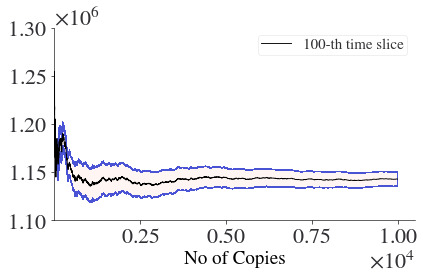

In [14]:

_ =plot_single_sequence(df, 100)
_ = plt.xlabel('No of Copies')
plt.xlim(left = 0.000003*10000)
plt.xlim(right = 1.05*10000)

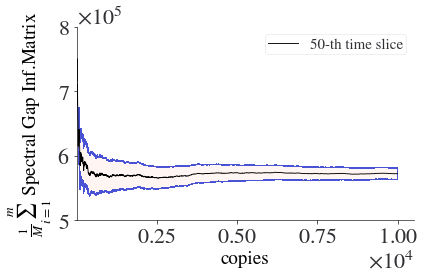

In [27]:
# plt.figure() 
# df =pd.DataFrame(im_metrics_dict[keys[0]])
# seq_no =50
# plot_single_sequence(df, seq_no)
# plt.xlim(left = 0.000003*10000)
# plt.xlim(right = 1.05*10000)


# _= plt.ylabel(r'$\frac{1}{M}\sum_{i=1}^{m}$ Spectral Gap Inf.Matrix')
# _= plt.xlabel('copies')
# #plt.title('Information Matrix Spectral Gap ')
# plot_title = 'seq_no_'+str(seq_no)+'_information_matrix_spectral_gap.png'
# plot_loc = os.path.join( figures_destination, plot_title)
# plt.savefig(plot_loc, dpi=1300)


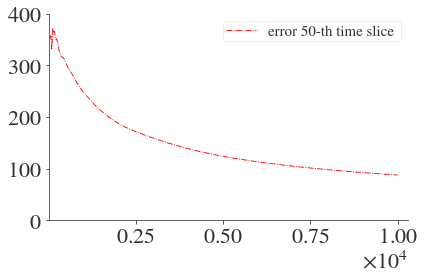

In [28]:
seq_no =50
x= np.asarray(df.iloc[:,seq_no].index)
y=df.iloc[:,seq_no].expanding(10).mean()
error=y.expanding(seq_no).std()
plt.xlim(left = 0.00003*10000)
plt.xlim(right = 1.03*10000)
#plt.title('Information Matrix Spectral Gap ')
plot_title = 'seq_no_'+str(seq_no)+'_error_information_matrix_spectral_gap.png'
_ = plot_loc = os.path.join( figures_destination, plot_title)
_ = plt.savefig(plot_loc, dpi=1200)
_ = plt.plot(x, error, linestyle='dashdot',linewidth=0.9, color='r')
_ = plt.legend(['error '+str(seq_no)+'-th time slice '])
plot_loc = os.path.join( figures_destination, plot_title)
plt.savefig(plot_loc, dpi=1300)

### Determinant

In [ ]:

#plot_single_sequence(determ_df, 10)
plot_single_sequence(determ_df, 14)

# _ =plt.xlabel('Copies')
_ =plt.ylabel(r'$\frac{1}{M}\sum_{i=1}^{m} \det$ Inf.Matrix')
plt.xlim(left= 0.000001*10000, right = 1.015*10000)
plot_title = 'information_matrix_determinant.png'
plot_loc = os.path.join( figures_destination, plot_title)
plt.savefig(plot_loc, dpi=1300)

## Trace

In [ ]:

#plot_single_sequence(determ_df, 10)
plot_single_sequence(trace_df, 14)


_ =plt.ylabel(r'$\frac{1}{M}\sum_{i=1}^{m}$ Inf.Matrix')
plt.xlim(left= 0.000001*10000, right = 1.01*10000)
plot_title = 'information_matrix_trace.png'
plot_loc = os.path.join( figures_destination, plot_title)
plt.savefig(plot_loc, dpi=1300)

In [ ]:
fileIdx = 2
file_path = os.path.join(laCie, npy_files[fileIdx])
print(file_path)

In [ ]:
ksi_metrics = open_pickle_filepath(file_path)
ksi_metrics.item().keys()

In [ ]:
ksi_spectral_df = pd.DataFrame(ksi_metrics.item()['spectral'])
ksi_determ_df = pd.DataFrame(ksi_metrics.item()['determ'])
ksi_trace_df = pd.DataFrame(ksi_metrics.item()['trace'])


In [ ]:
plot_single_sequence(ksi_spectral_df, 14)
_ = plt.xlim(left = 0.0000004* 10000, right = 1.02*10000)
plt.ylabel(r'spectral gap for $\xi$')
plot_title = 'ksi_spectral.png'
plot_loc = os.path.join( figures_destination, plot_title)
plt.savefig(plot_loc, dpi=1300)

In [ ]:
plot_single_sequence(ksi_determ_df, 14)
_ = plt.xlim(left = 0.0000004* 10000, right = 1.02*10000)
plt.ylabel(r'determ for $\xi$')
plot_title = 'ksi_determ.png'
plot_loc = os.path.join( figures_destination, plot_title)
plt.savefig(plot_loc, dpi=1300)

In [ ]:

plot_single_sequence(ksi_trace_df, 14)
_ = plt.xlim(left = 0.0000004* 10000, right = 1.02*10000)
plt.ylabel(r'trace for $\xi$')
plot_title = 'ksi_trace.png'
plot_loc = os.path.join( figures_destination, plot_title)
plt.savefig(plot_loc, dpi=1300)

In [ ]:
df = ksi_determ_df




for i in [5,6,15, 50]:
        x= np.asarray(df.iloc[:,i].expanding(100).mean())
        _=plt.plot(x,linestyle='--', label =str(10*i)+'-slice')
        plt.xlim(left = 0.000004 *10000, right = 1.02 *10000)
plt.xlabel('No of Sequence', fontsize =22)
plt.ylabel(r'determ $\xi$', fontsize =22)
plot_title = 'ksi_determ_convergence.png'
plot_loc = os.path.join( figures_destination, plot_title)
plt.savefig(plot_loc, dpi=1300)
plt.legend()


In [ ]:
df = ksi_trace_df

plt.style.use('ggplot')


for i in [5,6,15, 50]:
        x= np.asarray(df.iloc[:,i].expanding(100).mean())
        _=plt.plot(x,linestyle='--', label =str(10*i)+'-slice')
        plt.xlim(left = 0.000004 *10000, right = 1.02 *10000)
plt.xlabel('No of Sequence', fontsize =22)
plt.ylabel(r'trace $\xi$', fontsize =22)
plot_title = 'ksi_trace_convergence.png'
plot_loc = os.path.join( figures_destination, plot_title)
plt.savefig(plot_loc, dpi=1300)
plt.legend()


In [15]:
fileIdx = 6
file_path = os.path.join(laCie, npy_files[fileIdx])
print(file_path)
npy_files

/media/ak/LaCie/fischer_polar_3_.pkl


['fischer_polar.pkl',
 'im_metrics.pkl',
 'ksi_metrics.pkl',
 'fischer_polar_2_.pkl',
 'im_metrics_2_.pkl',
 'ksi_metrics_2_.pkl',
 'fischer_polar_3_.pkl',
 'im_metrics_3_.pkl',
 'ksi_metrics_3_.pkl']

In [16]:
fisher = pd.DataFrame(open_pickle_filepath(file_path)[0])

No handles with labels found to put in legend.


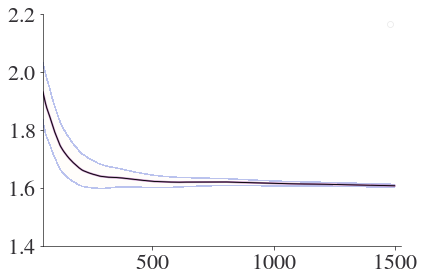

In [40]:
y = fisher[1].expanding(20).mean()
x= np.asarray(fisher[1].index)
plt.plot(y)
#plt.plot(fisher[0].expanding(100).mean())
error=y.expanding(10).std()*100
plt.plot(x, y, 'k-',linewidth=0.9)
plt.fill_between(x, y-error/x, y+error/x, alpha=0.3, edgecolor='#1C3ACD', facecolor='#fff9f2',
                     linewidth=0.2, linestyle='dashdot', antialiased=False)
plt.xlim(right = 1525)
plt.xlim(left = 50)
#plt.ylabel('Fischer Polar Coordinate', fontsize =22)
#plt.xlabel('Length of Sequence', fontsize =22)
plot_title = 'fisher_one.png'
plot_loc = os.path.join( figures_destination, plot_title)
plt.savefig(plot_loc, dpi=1300)
plt.legend()


No handles with labels found to put in legend.


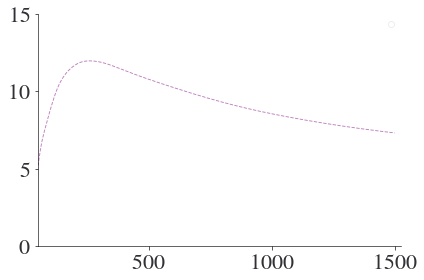

In [41]:
plt.plot(error, linewidth =0.9, linestyle ='--')
plt.xlim(right = 1525)
plt.xlim(left = 50)
plot_title = 'error_fisher_one.png'
plot_loc = os.path.join( figures_destination, plot_title)
plt.savefig(plot_loc, dpi=1300)
plt.legend()


No handles with labels found to put in legend.


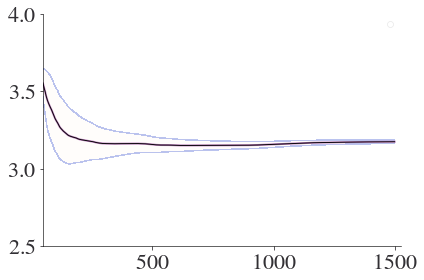

In [42]:
y = fisher[2].expanding(20).mean()
x= np.asarray(fisher[2].index)
plt.plot(y)
#plt.plot(fisher[0].expanding(100).mean())
error=y.expanding(10).std()*200
plt.plot(x, y, 'k-',linewidth=0.9)
plt.fill_between(x, y-error/x, y+error/x, alpha=0.3, edgecolor='#1C3ACD', facecolor='#fff9f2',
                     linewidth=0.2, linestyle='dashdot', antialiased=False)
plt.xlim(right = 1525)
plt.xlim(left = 50)
#plt.xlabel('Length of Sequence')
plot_title = 'fisher_two.png'
plot_loc = os.path.join( figures_destination, plot_title)
plt.savefig(plot_loc, dpi=1300)
plt.legend()

No handles with labels found to put in legend.


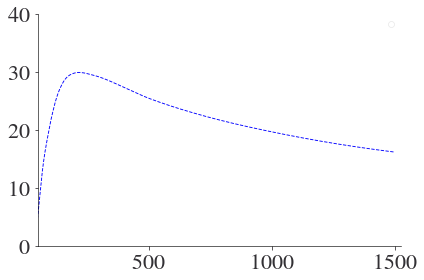

In [46]:
_ =plt.plot(error, linewidth =0.9, linestyle ='--', color ='b')

_ =plt.xlim(right = 1525)
_ =plt.xlim(left = 50)
_ =plot_title = 'error_fisher_two.png'
_ =plot_loc = os.path.join( figures_destination, plot_title)
_ =plt.savefig(plot_loc, dpi=1300)
_ =plt.legend()
